<a href="https://colab.research.google.com/github/stemarzo/DISME/blob/main/01_first_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRIMA ESERCITAZIONE

Prima esercitazione basica per arivare tutti ad un primo livello comune

###Library

In [1]:
import IPython.display as ipd
from matplotlib import pyplot as plt

In [2]:
from scipy.io import wavfile as wav
from scipy.fft import rfft, fft, irfft,ifft, fftfreq
from scipy.signal import fftconvolve

import numpy as np

### Basic i/o hello

In [4]:
hello_rate, hello = wav.read('audio/hello.wav') 

Restituisce due output:


*   hello_rate = indica la frequenza di campionamento
*   hello = la vera e propria traccia audio



In [5]:
hello_rate #per ogni secondo di traccia, numero campioni

22050

In [7]:
hello.shape #dentro puoi trovare 18000*2 numeri, 

(18859,)

Matrice 18000 righe e due colonne, le due colonne sono audio destro e sinistro.

Per semplicità ne considereremo solo uno.

In [6]:
hello = hello[:,0] # tolgo un canale audio

Ora si ascolta la traccia. 

Per poterlo fare si specifica la traccia e la frequenza di riproduzione. 







In [8]:
ipd.Audio(hello, rate=hello_rate)  

Dimezziamo ad esempio la frequenza di riproduzione

In [9]:
ipd.Audio(hello, rate=hello_rate*0.5) 

Salviamo ora la traccia rallentata su disco.

In [10]:
wav.write('audio/hello_slow.wav', rate=int(hello_rate*0.5), data=hello) 

Plottiamo la traccia hello

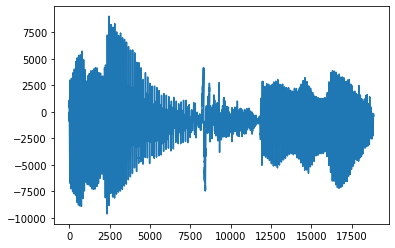

In [12]:
plt.plot(hello)
plt.show() #per un ambiente di tipo non grafico

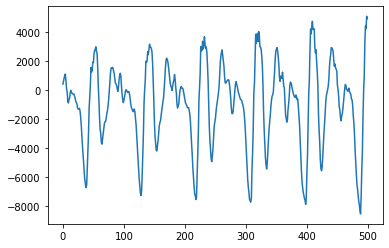

In [13]:
plt.plot(hello[0:500])
plt.show()

### Basic i/o whistle

In [14]:
whistle_rate, whistle = wav.read('audio/whistle.wav')

In [15]:
whistle_rate

44100

In [16]:
whistle.shape

(113664,)

In [17]:
ipd.Audio(whistle, rate=whistle_rate)

Nei primi campioni non c'è niente, quindi la ispeziono a posizioni più avanzate.

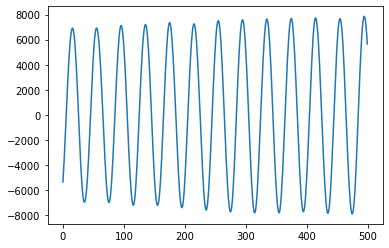

In [18]:
plt.plot(whistle[40000:40500])
plt.show()

### Basic i/o voice

In [19]:
voice_rate, voice = wav.read('audio/voice.wav')

In [20]:
voice_rate

44100

In [21]:
voice.shape

(120768,)

In [22]:
ipd.Audio(voice, rate=voice_rate)

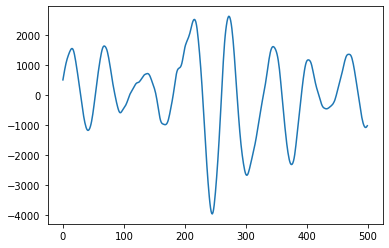

In [ ]:
plt.plot(voice[40000:40500])
plt.show()

### Fourier analysis voice

Permette di trovare la trasformata di fourier

In [23]:
voice_fft = fft(voice)

In [24]:
voice.shape

(120768,)

In [25]:
voice_fft.shape

(120768,)

La quantità di informazioni è la medesima

Plottiamo la trasformata

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


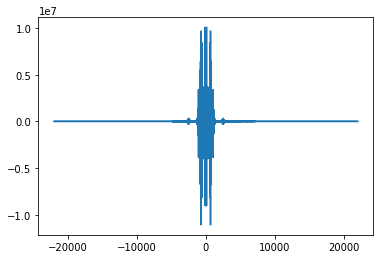

In [ ]:
voice_freqs = fftfreq(len(voice), 1.0/voice_rate) #restitusice un vettore che possiamo usare per l'asse orizzontale
plt.plot(voice_freqs, voice_fft)
plt.show() #basse frequenze nel centro, segnale simmetrico per i numeri discreti

Visto che le frequenze sono simmetriche rispetto a 0 andiamo noi a vedere solo quelle positive, allora utilizziamo la funzione rfft

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


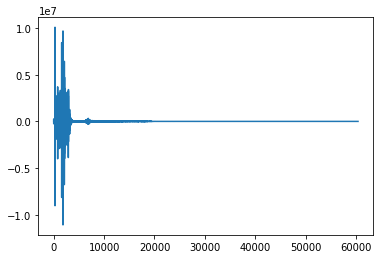

In [ ]:
voice_ft = rfft(voice) # real trasformata
plt.plot(voice_ft)
plt.show() #composta da diverse componenti, visto che non è un'unica sinusoide

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


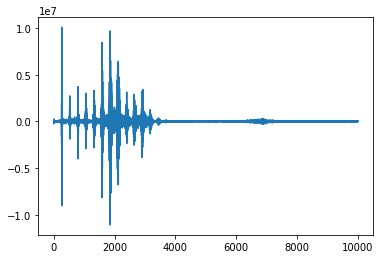

In [ ]:
plt.plot(voice_ft[0:10000,])
plt.show()

### Fourier analysis whistle

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


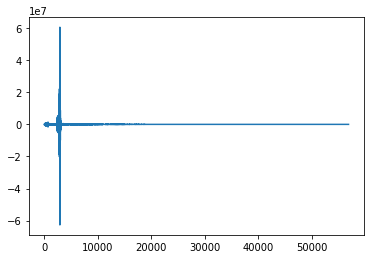

In [28]:
whistle_ft = rfft(whistle) # real trasformata, è una visione alternativa, penso sia solo un ramp visto che sono simmetriche per i numeri discreti
plt.plot(whistle_ft[0:100000])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


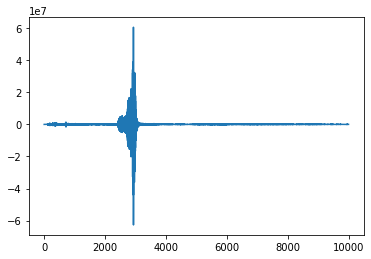

In [29]:
plt.plot(whistle_ft[0:10000,]) # un unico picco che rappresenta la caratteristica dell'onda sinusoidale mostrata in precedenza, vi è un po di rumore
plt.show()

### Low pass filtering hello

Visualizziamola nell'ambito delle frequenze

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


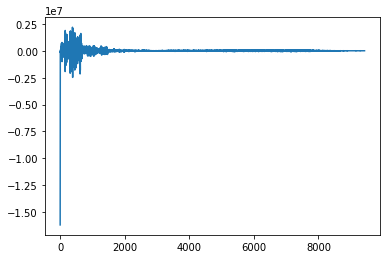

In [31]:
hello_ft = rfft(hello)
plt.plot(hello_ft)

Costruzione del filtro passa basso

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


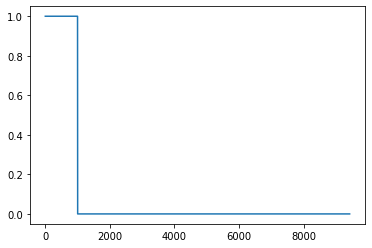

In [32]:
lp = hello_ft*0
lp[0:1000] =1.0
plt.plot(lp)

Applico il filtro con una moltiplicazione punto a punto

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


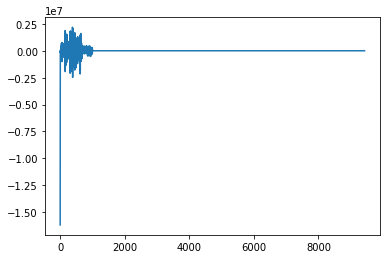

In [33]:
hello_ft_lp = hello_ft*lp
plt.plot(hello_ft_lp) 

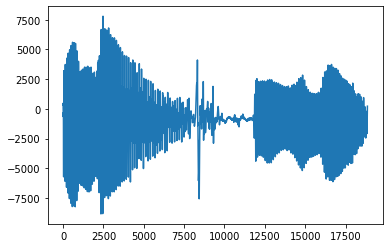

In [34]:
hello_it_lp = irfft(hello_ft_lp) # si torna indietro, passo la versione low pass 
plt.plot(hello_it_lp)

In [37]:
ipd.Audio(hello, rate=hello_rate) 

In [38]:
ipd.Audio(hello_it_lp, rate=hello_rate) # audio low pass

Abbiamo eliminato il 70% dell'audio che c'era dentro, ma si sente lo stesso, questo come compressione, è una possibile applicazione della trasformata di fourier

### High pass filtering hello

In [39]:
hello_hp=irfft(hello_ft*(1-lp))
ipd.Audio(hello_hp, rate=hello_rate) # per riprodurre l'audio high pass pass

### Convoluzione

In [41]:
violin_r, violin = wav.read('audio/violin.wav')
violin = violin[0:int(violin_r*2)]  
ipd.Audio(violin, rate=violin_r)

In [42]:
bang1_r, bang1 = wav.read('audio/bang1.wav')
ipd.Audio(bang1, rate=bang1_r)

In [43]:
conv1 = fftconvolve(bang1, violin) 
ipd.Audio(conv1, rate=violin_r)

è come se sentissimo il violino che suona in una stanza dove c'è stato uno sparo, prendiamo praticamente la traccia del violino e la applichiamo in tutte le posizioni della traccia dello sparo. 

Praticamente la convuluzione fa traslare il segnale del violino su quello dello sparo andandolo a riscalare per il volume che aveva lo sparo

In [44]:
bang2_r, bang2 = wav.read('audio/bang2.wav')
ipd.Audio(bang2, rate=bang2_r)

In [45]:
conv2 = fftconvolve(bang2, violin) #è come se sentissimo il violino che suona in una stanza dove c'è stato uno sparo
ipd.Audio(conv2, rate=violin_r)